In [1]:
import numpy as np

Array = np.loadtxt(
    "GalaxyFromIllustrisTNG50_Stars_Subhalo521803.txt")
Pos = Array [ : , 0:3 ]
Mass = Array [ : , 3 ]
InitialMass = Array [ : , 4 ]
RedshiftFormed = Array [ : , 5 ]

# Task 1

This task was very similar to the first Bonus exercise about Dark Matter, computationally speaking.

I followed the given code to obtain the requred tensors, eigenvalues and eigenvectors.

In [2]:
x, y, z = Pos[:,0], Pos[:,1], Pos[:,2]

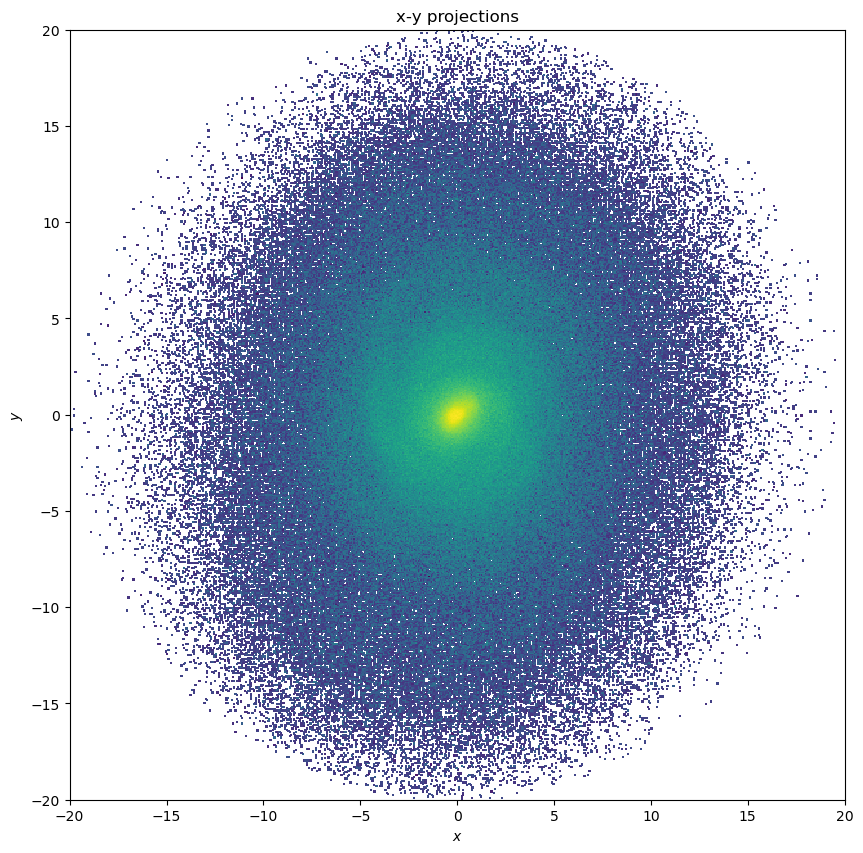

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(figsize = (10, 10))
plt.hist2d(x, y, bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass, norm = LogNorm())

plt.title("x-y projections")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

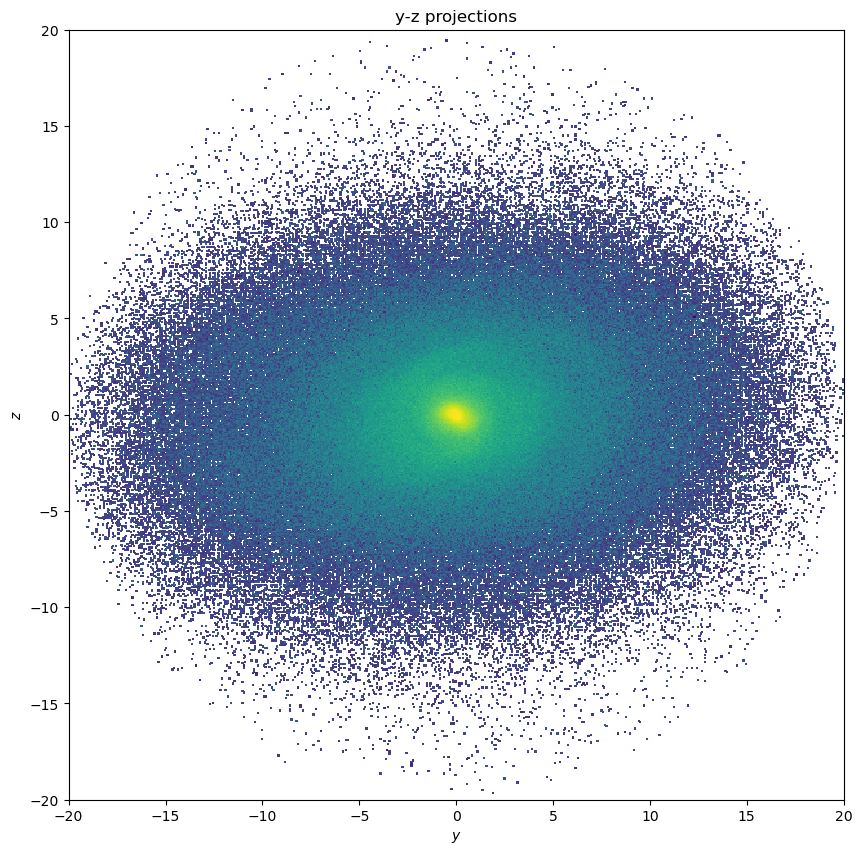

In [4]:
plt.figure(figsize = (10, 10))
plt.hist2d(y, z, bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass, norm = LogNorm())

plt.title("y-z projections")
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.show()

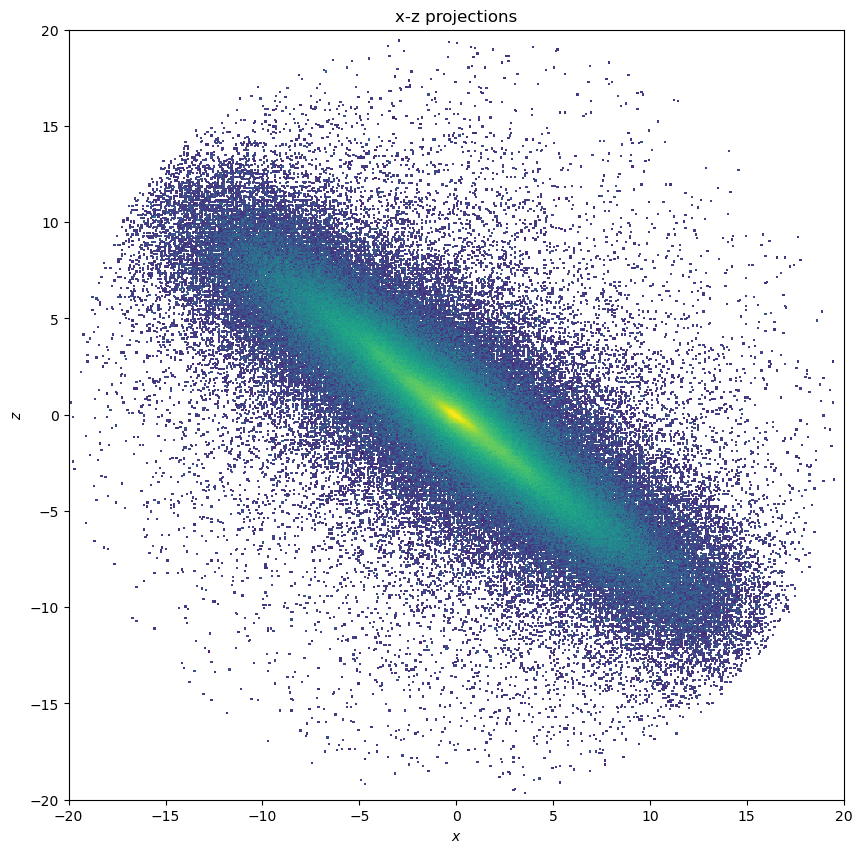

In [5]:
plt.figure(figsize = (10, 10))
plt.hist2d(x, z, bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass, norm = LogNorm())

plt.title("x-z projections")
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.show()

In [6]:
tensor = np.zeros( (3 ,3) )
tensor [0 ,0] = np.sum(Mass * ( y * y + z * z ))
tensor [1 ,1] = np.sum(Mass * ( x * x + z * z ))
tensor [2 ,2] = np.sum(Mass * ( x * x + y * y ))
tensor [0 ,1] = (-1) * np.sum(Mass * x * y )
tensor [1 ,0] = tensor [0 ,1]
tensor [0 ,2] = (-1) * np.sum(Mass * x * z )
tensor [2 ,0] = tensor [0 ,2]
tensor [1 ,2] = (-1) * np.sum(Mass * y * z )
tensor [2 ,1] = tensor [1 ,2]

In [7]:
eigval , eigvec = np.linalg.eig( tensor )
xdir = eigvec [: ,0]
ydir = eigvec [: ,1]
zdir = np.cross( xdir , ydir )

# Task 2

```python
Xprime, Yprime, Zprime
```
Followed the given steps to obtain the primed variables. Subsequent plotting is the same as Task 1

In [8]:
Xprime = xdir [0] * x + xdir [1] * y + xdir [2] * z
Yprime = ydir [0] * x + ydir [1] * y + ydir [2] * z
Zprime = zdir [0] * x + zdir [1] * y + zdir [2] * z

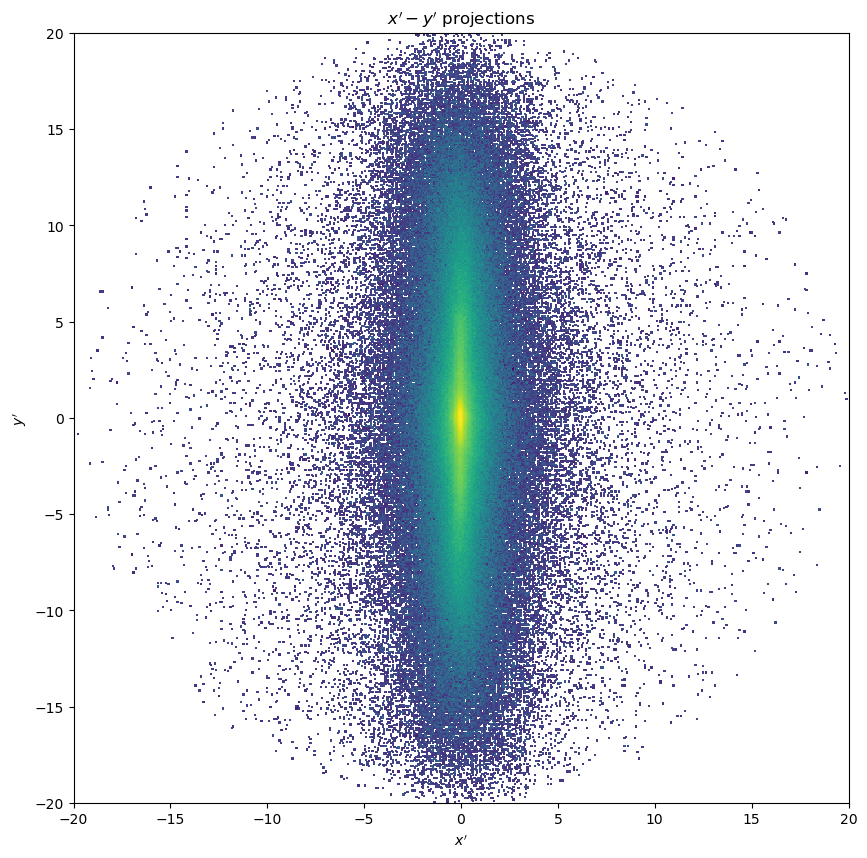

In [9]:
plt.figure(figsize = (10, 10))
plt.hist2d(Xprime, Yprime, bins = 600, 
           range = [ [ -20 , 20 ] , [ -20, 20 ] ], weights = Mass, 
           norm = LogNorm())

plt.title("$x'-y'$ projections")
plt.xlabel("$x'$")
plt.ylabel("$y'$")
plt.show()

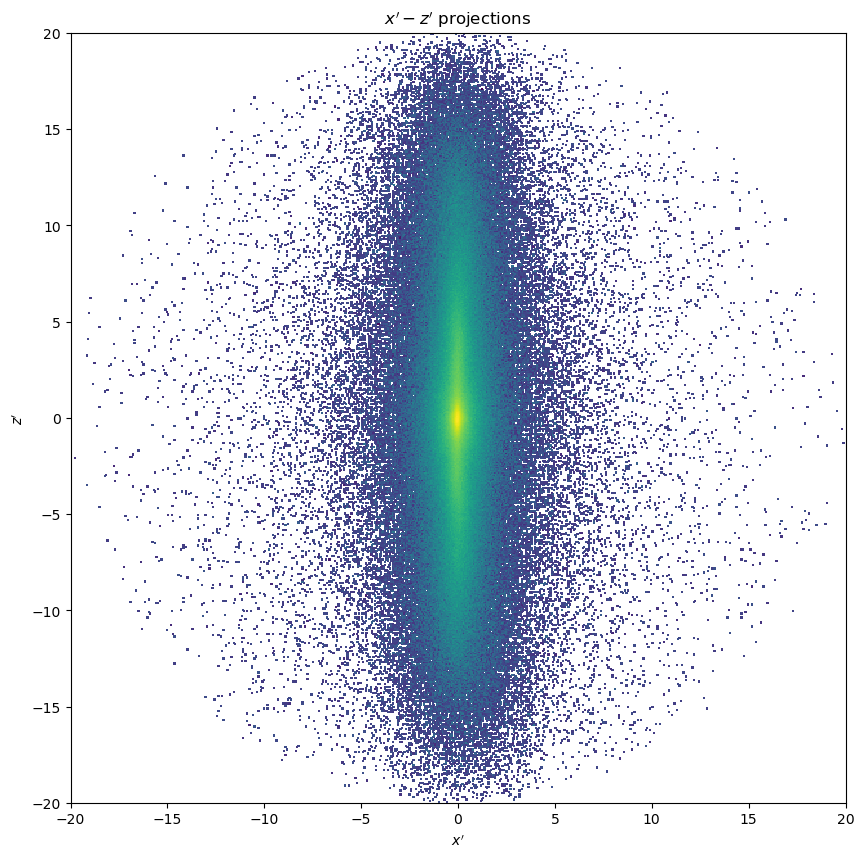

In [10]:
plt.figure(figsize = (10, 10))
plt.hist2d(Xprime, Zprime, bins = 600, 
           range = [ [ -20 , 20 ] , [ -20, 20 ] ], weights = Mass, 
           norm = LogNorm())

plt.title("$x'-z'$ projections")
plt.xlabel("$x'$")
plt.ylabel("$z'$")
plt.show()

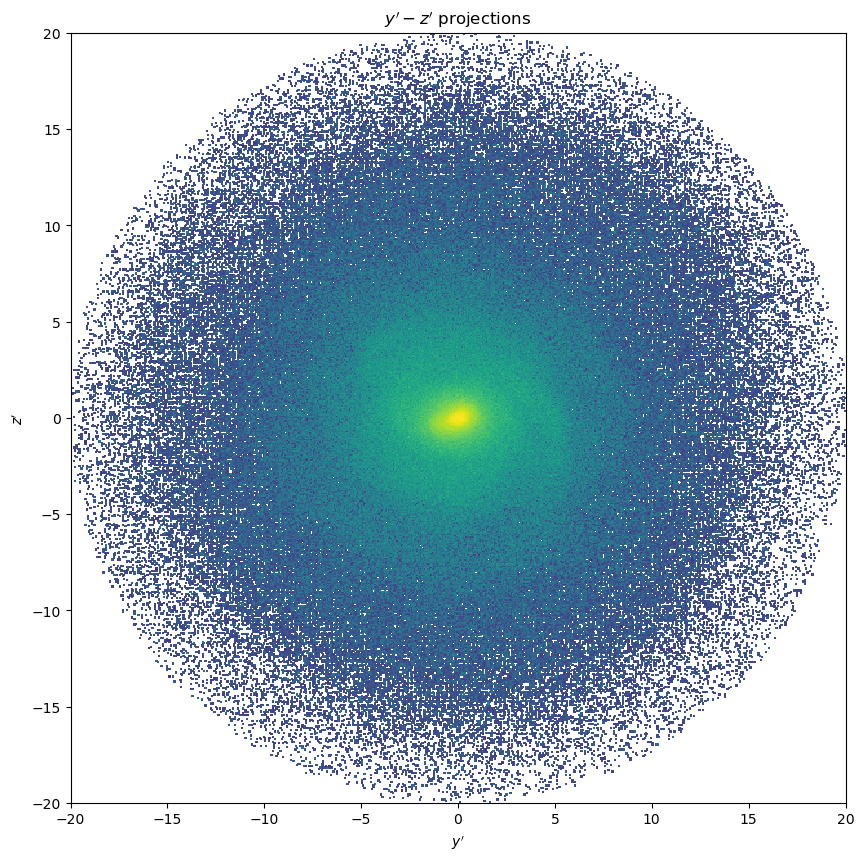

In [11]:
plt.figure(figsize = (10, 10))
plt.hist2d(Yprime, Zprime, bins = 600, 
           range = [ [ -20 , 20 ] , [ -20, 20 ] ], weights = Mass, 
           norm = LogNorm())

plt.title("$y'-z'$ projections")
plt.xlabel("$y'$")
plt.ylabel("$z'$")
plt.show()

# Task 3

The rotation is along the $x'$ axis as the galaxy is flattened in the projections involving the x-axis.

# Task 4

Radial distance of each particle in the y-z plane is given by:

In [12]:
R = np.sqrt ( Yprime ** 2 + Zprime ** 2 )

# Task 5

```python
R_shell_points
```
I borrowed the variable naming scheme from the first bonus exercise. To set-up the bins, I obtained 21 equally spaced numbers between
```python
np.min(R), np.max(R)
```
This allows for the creation of 20 bins using the digitize (and bins are filled using bin_count function) function as in the previous bonus exercise. 

Area of the shells is calculated as:
```python
Area_shell = np.pi * (R_shell_points[1:]**2 - R_shell_points[:-1]**2)
```

However, since some points are effectively on the centre in the $y'-z'$ plane, I created the variable:
```python
R_midpoints = 0.5 * (R_shell_points[1:] + R_shell_points[:-1])
```
for plotting purposes. After this using the semilogy function as recommended, I concluded the given task.

```python
\u2609
```
is the unicode for the mass of sun symbol. There is a function in LaTeX for the same but that is not accessible from matplotlib, as far as I am aware.

---

The obtained graph is as accepted from the research paper linked in the questionnaire.

<a id='T5'></a>

In [13]:
R_shell_points = np.linspace(np.min(R), np.max(R), 21)

In [14]:
R_shell_points

array([2.52287208e-04, 1.00401505e+00, 2.00777782e+00, 3.01154059e+00,
       4.01530336e+00, 5.01906612e+00, 6.02282889e+00, 7.02659166e+00,
       8.03035443e+00, 9.03411719e+00, 1.00378800e+01, 1.10416427e+01,
       1.20454055e+01, 1.30491683e+01, 1.40529310e+01, 1.50566938e+01,
       1.60604566e+01, 1.70642193e+01, 1.80679821e+01, 1.90717449e+01,
       2.00755076e+01])

In [14]:
R_shell = np.digitize(R, R_shell_points)
DM_shell = np.bincount(R_shell, Mass)[1:-1]

In [15]:
Area_shell = np.pi * (R_shell_points[1:]**2 - R_shell_points[:-1]**2)
S_density = DM_shell/Area_shell

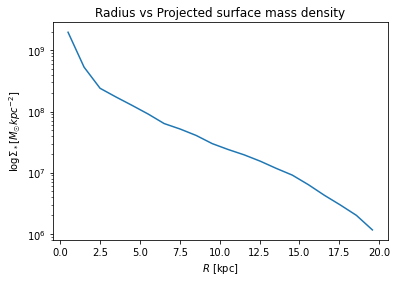

In [16]:
R_midpoints = 0.5 * (R_shell_points[1:] + R_shell_points[:-1])
plt.semilogy(R_midpoints, S_density)

plt.title("Radius vs Projected surface mass density")
plt.xlabel("$R$ [kpc]")
plt.ylabel("$\log \Sigma_* [M_\u2609 kpc^{-2}]$")
plt.show()

# Task 6

```python
Lookback = Planck15.lookback_time(RedshiftFormed)
```
contains the lookback times in an array followed by the unit. The '.value' returns the numeric values in GYr

In [17]:
from astropy.cosmology import Planck15

Lookback = Planck15.lookback_time(RedshiftFormed)
print(Lookback.value)

[10.18879838 10.17100637 12.0542464  ... 12.17962837  4.82357638
 13.27534104]


# Task 7

```python
Lookback_bins = np.linspace(np.min(Lookback.value), np.max(Lookback.value), 101)
```
makes 100 bins between the minimum lookback time and the maximum lookback time.

---

```python
Lookback_midpoint = 0.5 * (Lookback_bins[1:] + Lookback_bins[:-1])
```
helps in plotting.

---

```python
Lookback_bin_size = (Lookback_bins[1:] - Lookback_bins[:-1])
```
though the bins are uniformly spaced, this line creates an array of that bin size but of the length on 101 or any arbitrary bin number of choice.

---

```python
Lb_shell = np.digitize(Lookback.value, Lookback_bins)
```

Sticking to the nomenclature for binning, Lb_shell creates bins for the Lookback times.

---

```python
DMt_shell = np.bincount(Lb_shell, InitialMass)[1:-1]
```

This variable stores the sum mass of stars formed per Lookback time bin.

---

```python
St_form_rate = DMt_shell/Lookback_bin_size
```
computes the mass of stars formed in given Lookback time intervals. On my first attempt I used the Lookback_midpoint variable, however, that increase with time and is not representative of the mass of stars formed per bin. Thus, lookback_bin_size is being used for calculation of Star formation rate.

---


```python
plt.plot(Lookback_midpoint, St_form_rate*1e-9 , c = 'black')
```

Lookback_midpoint is, however, used for plotting as it correctly displays at which Lookback time was the previously computed mass formed. Multiplying by 1e-9 was done to change the units to Yr from GYr.

---

```python
plt.gca().invert_xaxis()
```
is prety self explanatory and reverse the $X$ Axis.

---

The graph is very much like the one in the linked research paper.

<a id='T7'></a>

In [18]:
Lookback_bins = np.linspace(np.min(Lookback.value), 
                            np.max(Lookback.value), 101)
Lookback_midpoint = 0.5 * (Lookback_bins[1:] + Lookback_bins[:-1])
Lookback_bin_size = (Lookback_bins[1:] - Lookback_bins[:-1])

In [19]:
Lb_shell = np.digitize(Lookback.value, Lookback_bins)
DMt_shell = np.bincount(Lb_shell, InitialMass)[1:-1]

In [20]:
St_form_rate = DMt_shell/Lookback_bin_size

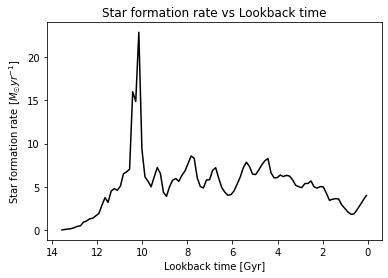

In [21]:
plt.plot(Lookback_midpoint, St_form_rate*1e-9 , c = 'black')

plt.gca().invert_xaxis()
plt.xlabel("Lookback time [Gyr]")
plt.ylabel("Star formation rate [$M_\u2609 yr^{-1}$]")
plt.title("Star formation rate vs Lookback time")
plt.show()

# Task 8

```python
print(Lookback.value[Lookback.value < 2.0])
print(Lookback.value[np.logical_and(Lookback.value > 6.0, Lookback.value < 8.0)])
```

Used these lines to test how logic statements worked with numpy arrays, found out about the function:
```python
np.logical_and(np.array1, np.array2))
```
which returns the result of using the and operator between the individual corresponding elements of the arrays. The 'and' keyword doesn't work for this purpose.

---

Plotting in the following code blocks was done as in previous tasks.

In [22]:
print(Lookback.value[Lookback.value < 2.0])
print(Lookback.value[np.logical_and(Lookback.value > 6.0, 
                                    Lookback.value < 8.0)])

[0.16111459 0.16297635 0.11982602 ... 0.07471696 1.56385698 1.32896006]
[7.29509948 7.64693464 6.89836593 ... 7.95109938 7.71519327 7.84722219]


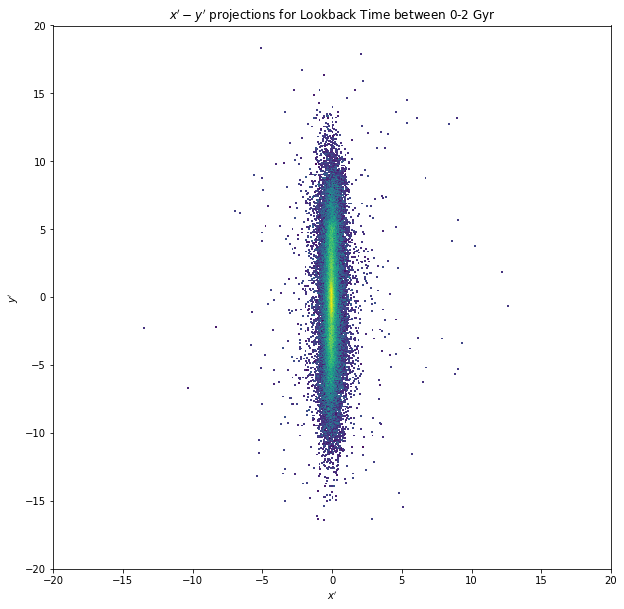

In [23]:
plt.figure(figsize = (10, 10))
plt.hist2d(Xprime[Lookback.value < 2.0], Yprime[Lookback.value < 2.0], 
           bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass[Lookback.value < 2.0], norm = LogNorm())

plt.title("$x'-y'$ projections for Lookback Time between 0-2 Gyr")
plt.xlabel("$x'$")
plt.ylabel("$y'$")
plt.show()

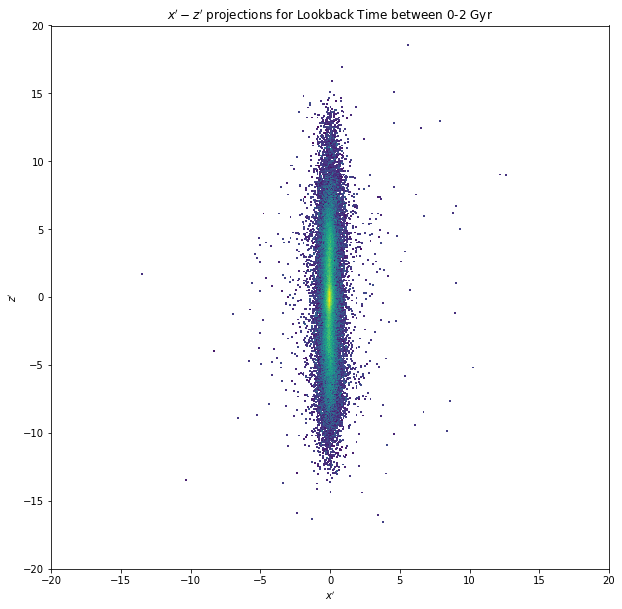

In [24]:
plt.figure(figsize = (10, 10))
plt.hist2d(Xprime[Lookback.value < 2.0], Zprime[Lookback.value < 2.0], 
           bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass[Lookback.value < 2.0], norm = LogNorm())

plt.title("$x'-z'$ projections for Lookback Time between 0-2 Gyr")
plt.xlabel("$x'$")
plt.ylabel("$z'$")
plt.show()

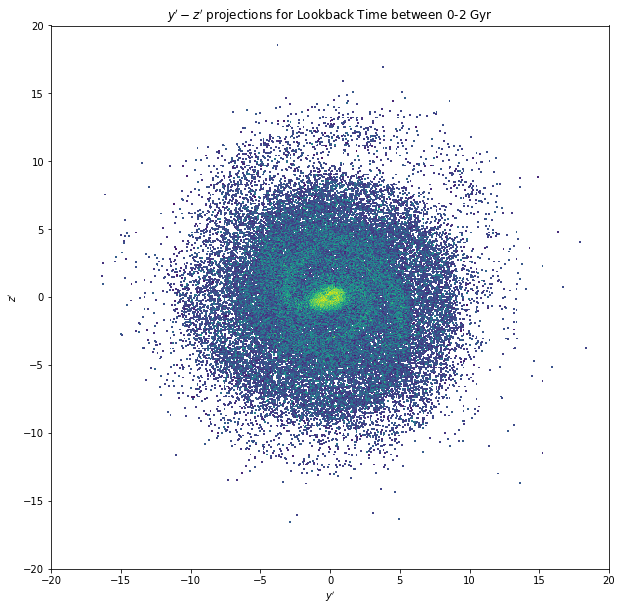

In [25]:
plt.figure(figsize = (10, 10))
plt.hist2d(Yprime[Lookback.value < 2.0], Zprime[Lookback.value < 2.0], 
           bins = 600, range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
           weights = Mass[Lookback.value < 2.0], norm = LogNorm())

plt.title("$y'-z'$ projections for Lookback Time between 0-2 Gyr")
plt.xlabel("$y'$")
plt.ylabel("$z'$")
plt.show()

# Task 9

The variables
```python
Intervals, Int_titles
```
enable the plotting of the different Lookback time periods using for-loops and reduces a previous block of text to the current code.

---

```python
plt.suptitle(Title)
```

This function is used to give a title over the entire collection of subplots as opposed to just the last one.

In [26]:
Intervals = [Lookback.value < 2.0, 
             np.logical_and(Lookback.value > 2.0, Lookback.value < 4.0), 
             np.logical_and(Lookback.value > 4.0, Lookback.value < 6.0),
             np.logical_and(Lookback.value > 6.0, Lookback.value < 10.0),
             Lookback.value >= 0.0]
Int_titles = ["Lookback time : 0-2 Gyr", "Lookback time : 2-4 Gyr", 
              "Lookback time : 4-6 Gyr", "Lookback time : 6-10 Gyr",
              "All Stars"]

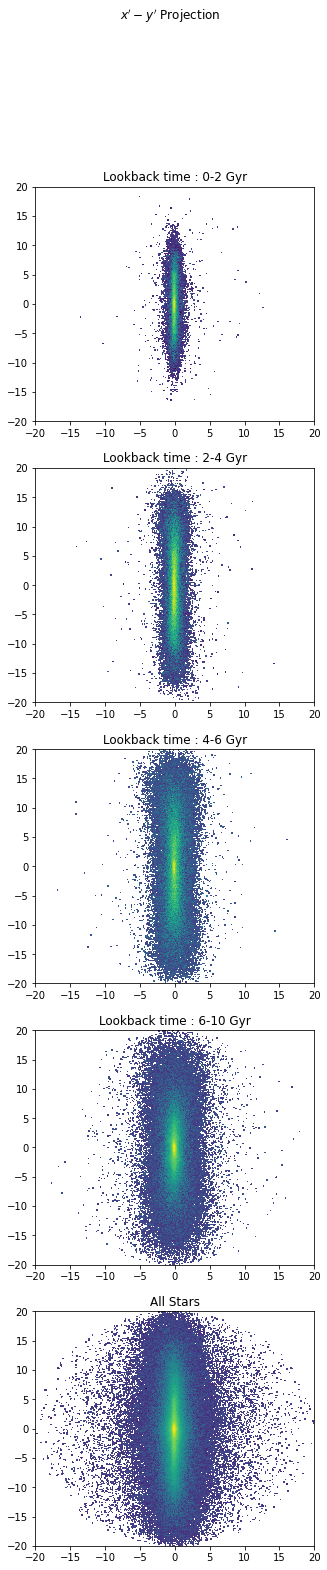

In [27]:
fig, axs = plt.subplots(5, 1, figsize=(5, 25))

for i in range(5):
    axs[i].hist2d(Xprime[Intervals[i]], Yprime[Intervals[i]], bins = 600, 
                  range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
                  weights = Mass[Intervals[i]], norm = LogNorm())
    axs[i].set_title(Int_titles[i])

plt.suptitle("$x' - y'$ Projection")
plt.show()

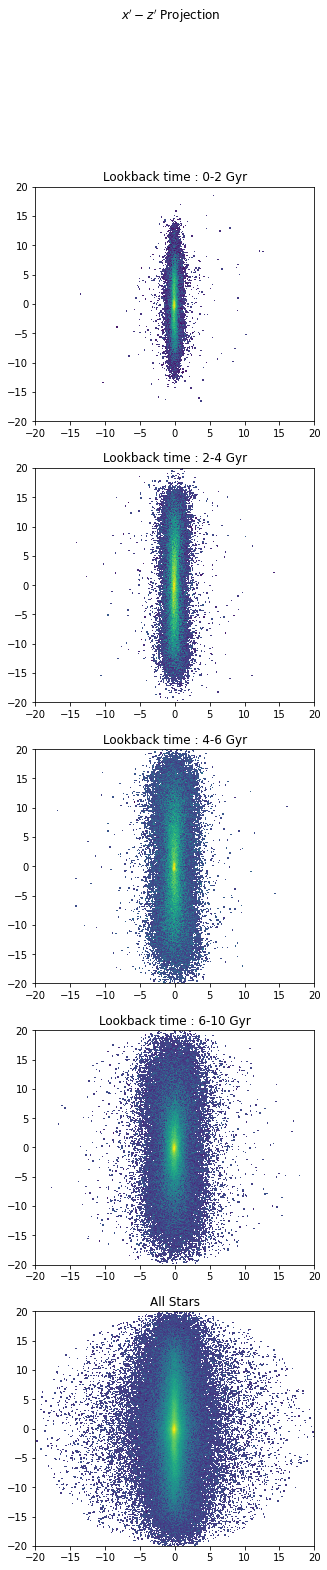

In [28]:
fig, axs = plt.subplots(5, 1, figsize=(5, 25))

for i in range(5):
    axs[i].hist2d(Xprime[Intervals[i]], Zprime[Intervals[i]], bins = 600, 
                  range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
                  weights = Mass[Intervals[i]], norm = LogNorm())
    axs[i].set_title(Int_titles[i])

plt.suptitle("$x' - z'$ Projection")
plt.show()

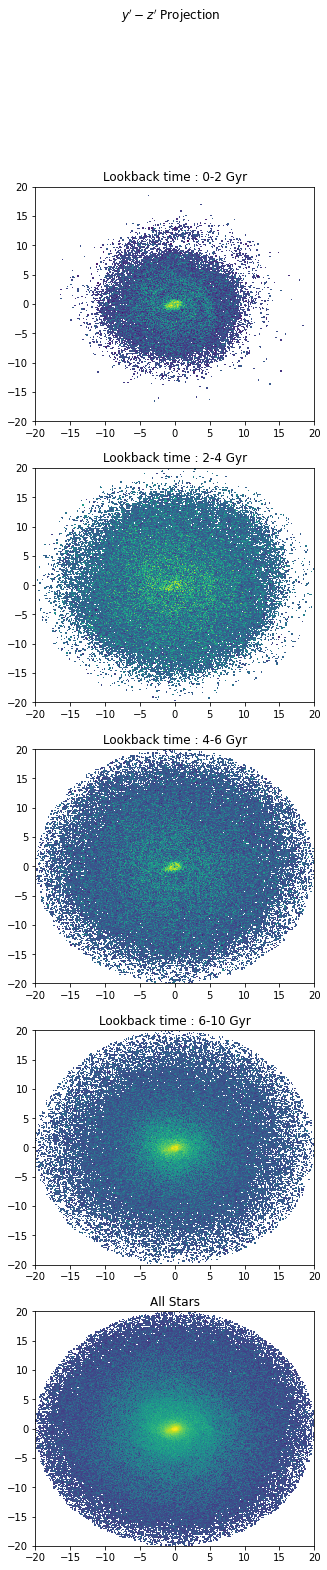

In [29]:
fig, axs = plt.subplots(5, 1, figsize=(5, 25))

for i in range(5):
    axs[i].hist2d(Yprime[Intervals[i]], Zprime[Intervals[i]], bins = 600, 
                  range = [ [ -20 , 20 ] , [ -20, 20 ] ], 
                  weights = Mass[Intervals[i]], norm = LogNorm())
    axs[i].set_title(Int_titles[i])
    
plt.suptitle("$y' - z'$ Projection")
plt.show()

Galaxy disc is much more easily visible from old stars, but it certainly starts taking form in the very early stages as well.

# Task 10

The task requires the repition of [Task 5](#T5) for the given Lookback time intervals.

```python
R_shell_points_int, R_shell_int, DM_shell_int, Area_shell_int, S_density_int, R_midpoints_int = [], [], [], [], [], []
```
initialises the lists which will store the required np.arrays for the needed plots.

---

Subsequent plotting combines the previous plotting knowledge and the knowledge of subplots but nothing else of not is seen in the code.

The graphs also form as expected

In [31]:
R_shell_points_int, R_shell_int, DM_shell_int, Area_shell_int, S_density_int, R_midpoints_int = [], [], [], [], [], []

for i in Intervals:
    R_shell_points_int.append(np.linspace(np.min(R[i]), np.max(R[i]), 21))
    R_shell_int.append(np.digitize(R[i], R_shell_points_int[-1]))
    DM_shell_int.append(np.bincount(R_shell_int[-1], Mass[i])[1:-1])
    Area_shell_int.append(np.pi * (R_shell_points_int[-1][1:]**2
                                   - R_shell_points_int[-1][:-1]**2))
    S_density_int.append(DM_shell_int[-1]/Area_shell_int[-1])
    R_midpoints_int.append(0.5 * (R_shell_points_int[-1][1:] + 
                                  R_shell_points_int[-1][:-1]))


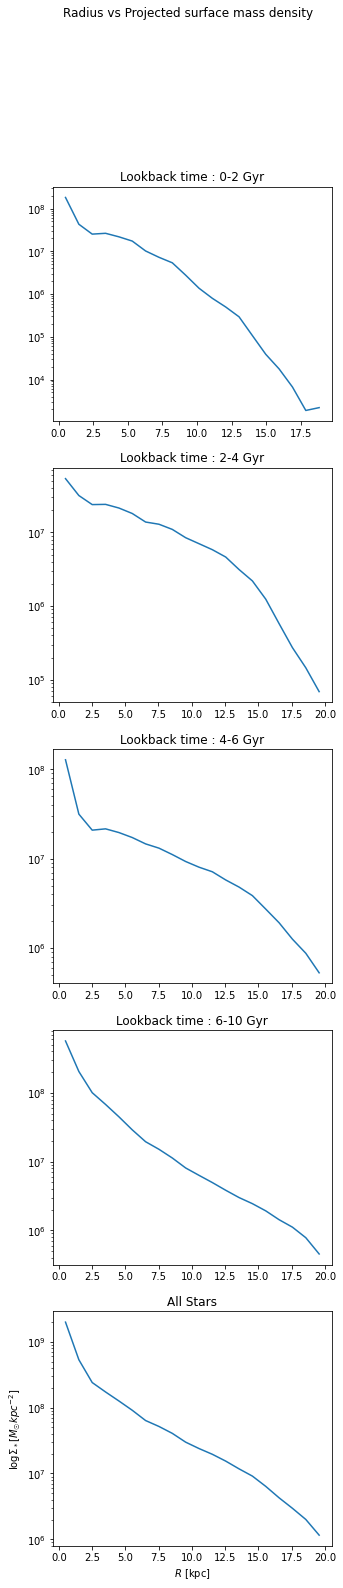

In [32]:
fig, axs = plt.subplots(5, 1, figsize=(5, 25))

for i in range(len(Intervals)):
    axs[i].semilogy(R_midpoints_int[i], S_density_int[i])
    axs[i].set_title(Int_titles[i])
    
plt.suptitle("Radius vs Projected surface mass density")
plt.xlabel("$R$ [kpc]")
plt.ylabel("$\log \Sigma_* [M_\u2609 kpc^{-2}]$")
plt.show()

From the point of view of presentation, I would have liked to have the common y-axis centered for all 5 subplots together, but the solutions I found online didn't seem to work.

Updating matplotlib to the lastest version was supposed to allow me to use the function:
```python
fig.supylabel("Y-label")
```
but it didn't seem to take effect, despite restarting Jupyter, perhaps I need to restart all instances of Jupyter for it to work.

Computationally, the biggest challenge was the Star Formation rate vs Lookback time [Task 7](#T7) but once I got help and later though about what I needed to plot mathematically and physically, it was quite trivial.